In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
!pip3 install imutils
!pip3 install torchsummary
from torchsummary import summary
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image
import imutils
import cv2
from matplotlib import pyplot as plt

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [42]:
train_data_path = "../input/intel-image-classification/seg_train/seg_train"
val_data_path = "../input/intel-image-classification/seg_test/seg_test"

(150, 150, 3)


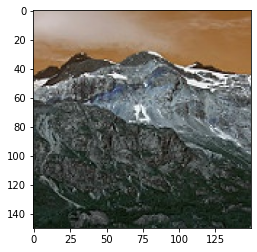

In [49]:
custom="../input/intel-image-classification/seg_train/seg_train/glacier/100.jpg"
import numpy as np
import cv2
im = cv2.imread(custom)
print(im.shape)
plt.imshow(im)
plt.show()


(150, 150, 3)


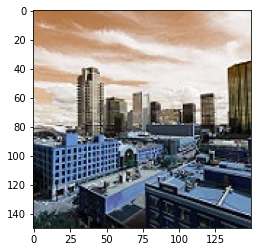

In [50]:
custom="../input/intel-image-classification/seg_train/seg_train/buildings/10006.jpg"
import numpy as np
import cv2
im = cv2.imread(custom)
print(im.shape)
plt.imshow(im)
plt.show()


(150, 150, 3)


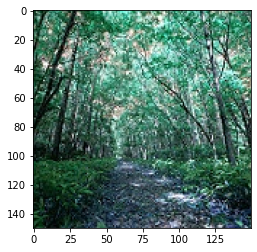

In [51]:
custom="../input/intel-image-classification/seg_train/seg_train/forest/10010.jpg"
import numpy as np
import cv2
im = cv2.imread(custom)
print(im.shape)
plt.imshow(im)
plt.show()

(150, 150, 3)


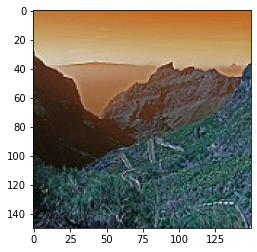

In [52]:
custom="../input/intel-image-classification/seg_train/seg_train/mountain/10002.jpg"
import numpy as np
import cv2
im = cv2.imread(custom)
print(im.shape)
plt.imshow(im)
plt.show()

(150, 150, 3)


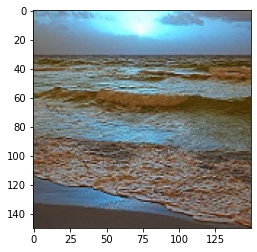

In [53]:
custom="../input/intel-image-classification/seg_train/seg_train/sea/10041.jpg"
import numpy as np
import cv2
im = cv2.imread(custom)
print(im.shape)
plt.imshow(im)
plt.show()

(150, 150, 3)


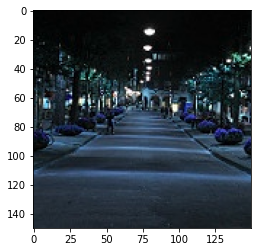

In [54]:
custom="../input/intel-image-classification/seg_train/seg_train/street/10015.jpg"
import numpy as np
import cv2
im = cv2.imread(custom)
print(im.shape)
plt.imshow(im)
plt.show()

In [26]:
img_transforms = transforms.Compose([
    
    # we resize the pictures
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

img_transforms_train = transforms.Compose([
    
    # we resize the pictures
    transforms.Resize((128,128)),
    #transforms.RandomCrop(128),
    #transforms.RandomRotation(12),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [27]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=img_transforms_train)

val_data = torchvision.datasets.ImageFolder(root=val_data_path,transform=img_transforms)

In [28]:
#Image -- Labels
buildings = 0
forest    = 1
glacier   = 2
mountain  = 3
sea       = 4
street    = 5

In [29]:
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True,drop_last=True)

val_data_loader  = torch.utils.data.DataLoader(val_data, batch_size=32, shuffle=True,drop_last=True)

In [30]:
images,label=next(iter(train_data_loader))

In [31]:
for images,labels in train_data_loader:
    print(images.shape,labels)
    break

torch.Size([32, 3, 128, 128]) tensor([4, 3, 5, 5, 2, 4, 3, 1, 3, 0, 3, 5, 1, 5, 3, 3, 0, 2, 2, 1, 0, 1, 5, 5,
        2, 1, 2, 0, 1, 0, 3, 0])


In [32]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [33]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 256x256x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        # convolutional layer (sees 128x128x32 tensor)
        self.conv2 = nn.Conv2d(32,64, 3, padding=1)
        # convolutional layer (sees 64x64x64 tensor)
        self.conv3 = nn.Conv2d( 64,128, 3, padding=1)
        # convolutional layer (sees 32x32x128 tensor)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (16*16* 128 -> )
        self.fc1 = nn.Linear(8 * 8*128, 4000)
        self.fc2 = nn.Linear(4000, 1500)
        self.fc3 = nn.Linear(1500,6)
        
        
                
        
        
        
        # dropout layer (p=0.40)
        self.dropout = nn.Dropout(0.30)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        # flatten image input
        x = x.view(-1, 8*8*128)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
     
        
       
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=4000, bias=True)
  (fc2): Linear(in_features=4000, out_features=1500, bias=True)
  (fc3): Linear(in_features=1500, out_features=6, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [34]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [35]:
import numpy as np
n_epochs = 10
k=0
valid_loss_min = np.Inf
train,val=[],[]
for i in range(1, n_epochs+1):

    # keep track of training
    
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for images, label in train_data_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            images, label = images.cuda(), label.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the batch loss
        loss = criterion(output, label)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()
        
    else:
        val_loss = 0
        accuracy = 0
    
        with torch.no_grad():
            model.eval()
            for images,labels in val_data_loader:
                if train_on_gpu:
                    images, labels = images.cuda(), labels.cuda()
                log_ps=model(images)
                val_loss+=criterion(log_ps,labels)


                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals = top_class ==labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train.append(train_loss/len(train_data_loader))
        val.append(val_loss/len(val_data_loader))

        print("epoch: {}/{}..".format(i, n_epochs),
                 "train loss: {:.3f}..".format(train_loss/len(train_data_loader)),
                  "val loss: {:.3f}".format(val_loss/len(val_data_loader)),
                  "val acc: {:.3f}".format(accuracy/len(val_data_loader)))
        
        

epoch: 1/10.. train loss: 1.018.. val loss: 0.827 val acc: 0.650
epoch: 2/10.. train loss: 0.701.. val loss: 0.607 val acc: 0.779
epoch: 3/10.. train loss: 0.542.. val loss: 0.540 val acc: 0.805
epoch: 4/10.. train loss: 0.467.. val loss: 0.450 val acc: 0.838
epoch: 5/10.. train loss: 0.405.. val loss: 0.461 val acc: 0.845
epoch: 6/10.. train loss: 0.343.. val loss: 0.587 val acc: 0.799
epoch: 7/10.. train loss: 0.309.. val loss: 0.502 val acc: 0.838
epoch: 8/10.. train loss: 0.260.. val loss: 0.499 val acc: 0.844
epoch: 9/10.. train loss: 0.216.. val loss: 0.570 val acc: 0.832
epoch: 10/10.. train loss: 0.185.. val loss: 0.704 val acc: 0.810
